Author: SAHANA M

Task2: Movie Recommendation system using collaborative Filtering

This analysis leverages the MovieLens dataset, a rich source of user ratings and movie metadata, to build a movie recommendation system. The MovieLens dataset is widely used in academic and industry research due to its comprehensive and well-structured information. For this analysis, we are using the smaller version of the dataset, which includes:

**ratings.csv:** Contains user-item interaction data with the following columns:
userId: Unique identifier for each user.

movieId: Unique identifier for each movie.

rating: User-provided rating for the movie (on a scale from 0.5 to 5.0).

timestamp: The time when the rating was provided.

**movies.csv:** Contains metadata about the movies with the following columns:
movieId: Unique identifier for each movie.

title: Title of the movie.

genres: Genres the movie belongs to (comma-separated).

**Data taken from Kaggle.com(Movie Lens)**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv("movies.csv")
dt=pd.read_csv("ratings.csv")


In [ ]:
df.head()#first few lines of movies dataset

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
dt.head()#first few lines of ratings dataset

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df.info()#overall info about movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
dt.info()#overall info about ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
# Merging the ratings and movies dataframes
new_df = pd.merge(dt, df, on='movieId')
new_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [ ]:
new_df.shape

(100836, 6)

In [ ]:
new_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


**Ratings Data Summary:**

Total Entries: 100,836

Average User ID: 326.13

Average Movie ID: 19,435.30

Average Rating: 3.50

Average Timestamp: 1,205,946,000 (Unix epoch time)

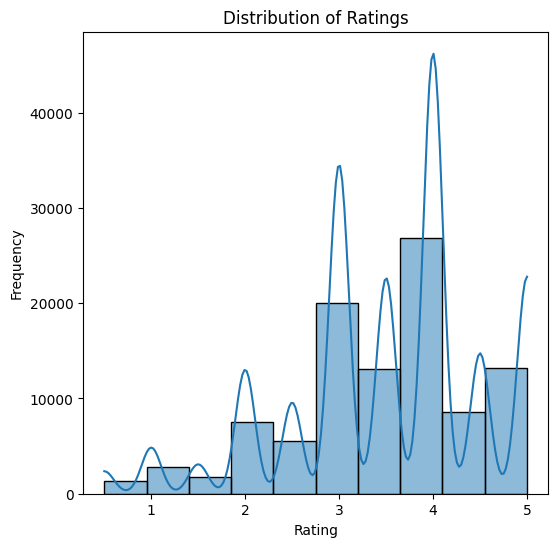

In [ ]:
plt.figure(figsize=(6, 6))
sns.histplot(data=new_df, x='rating', bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

A histogram showing the distribution of ratings provided by users.

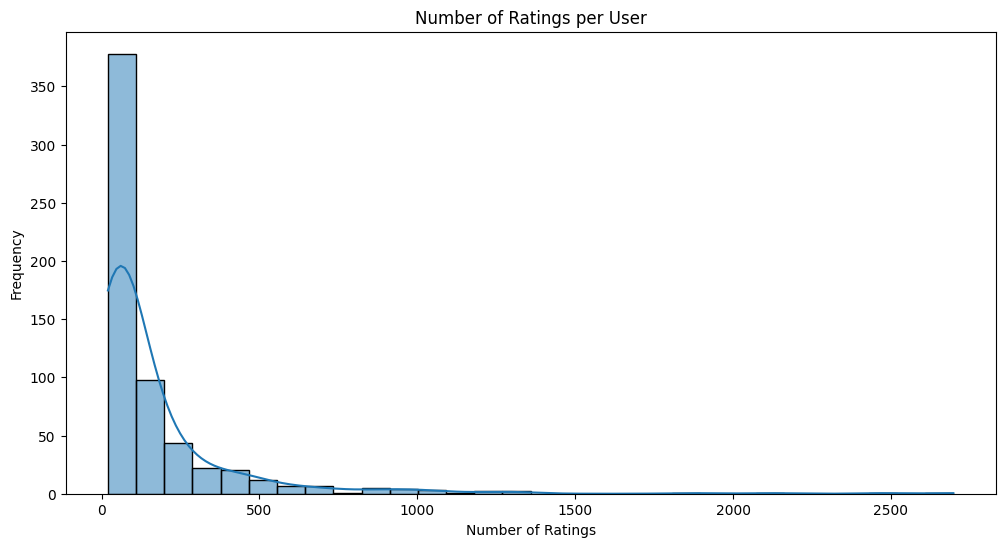

In [ ]:
plt.figure(figsize=(12, 6))
ratings_per_user = new_df.groupby('userId')['rating'].count()
sns.histplot(ratings_per_user, bins=30, kde=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

 bar chart showing the number of ratings each user has provided.

Long Tail:

There is a long tail extending to the right, showing that a small number of users have given a very high number of ratings.
These users can be considered as highly active or "super users."

User Engagement:

The majority of users are casual raters, indicating that while user engagement is broad, it is not deep for most users.



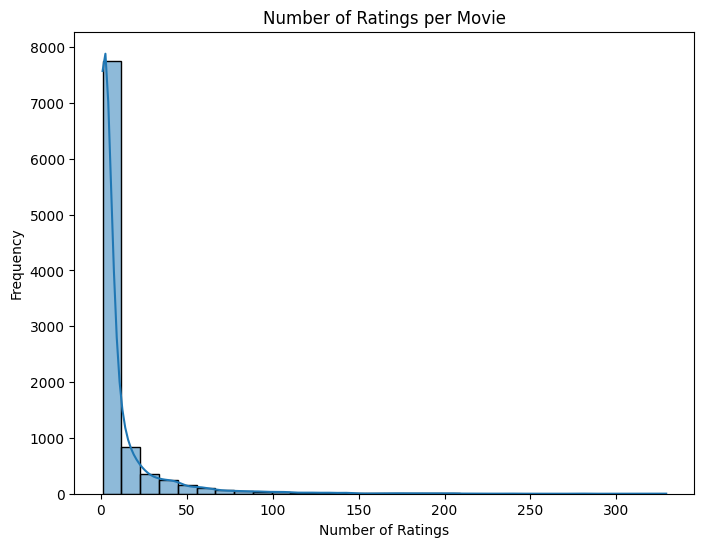

In [ ]:
#Number of Ratings per Movie
plt.figure(figsize=(8, 6))
ratings_per_movie = new_df.groupby('movieId')['rating'].count()
sns.histplot(ratings_per_movie, bins=30, kde=True)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

Highly Skewed Distribution:Most movies have received fewer than 50 ratings, with a significant concentration of movies receiving between 0 and 10 ratings.

Long Tail:These highly-rated movies are likely popular or well-known titles.

Peak Frequency:The peak of the distribution shows that the highest frequency of movies has received around 5-10 ratings.
This suggests that while many movies are rated, only a few receive a large volume of ratings.

A bar chart showing the number of ratings received by each movie.

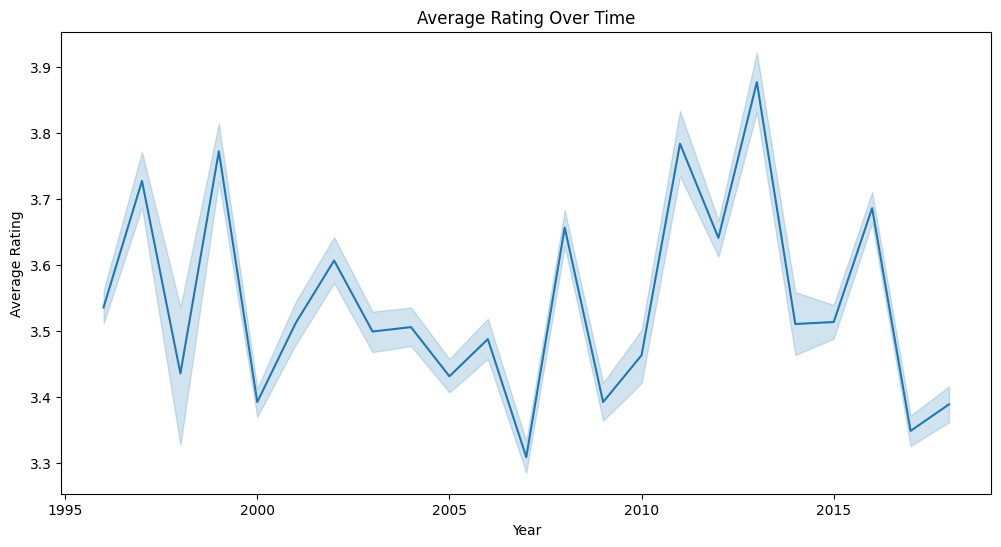

In [ ]:
new_df['year'] = pd.to_datetime(new_df['timestamp'], unit='s').dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(data=new_df, x='year', y='rating', estimator=np.mean)
plt.title('Average Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

A line plot showing how the average rating changes over time.

**General Trend:** There is no clear linear trend, but rather a cyclical pattern with peaks and troughs.

**High and Low Points:**

Peaks: The average rating peaks around the years 1999-2000, 2004-2005, and 2010-2011, indicating periods when the movies released during these times were well-received by users.

Troughs: The average rating drops around the years 1997, 2002, 2009, and significantly around 2015-2016, suggesting these periods had lower-rated movies or perhaps a change in user rating behavior.

**Recent Years:**
There is a noticeable drop in average rating around 2015-2016, followed by a slight increase.
This could indicate a period of less popular movies or a shift in user preferences and rating tendencies.



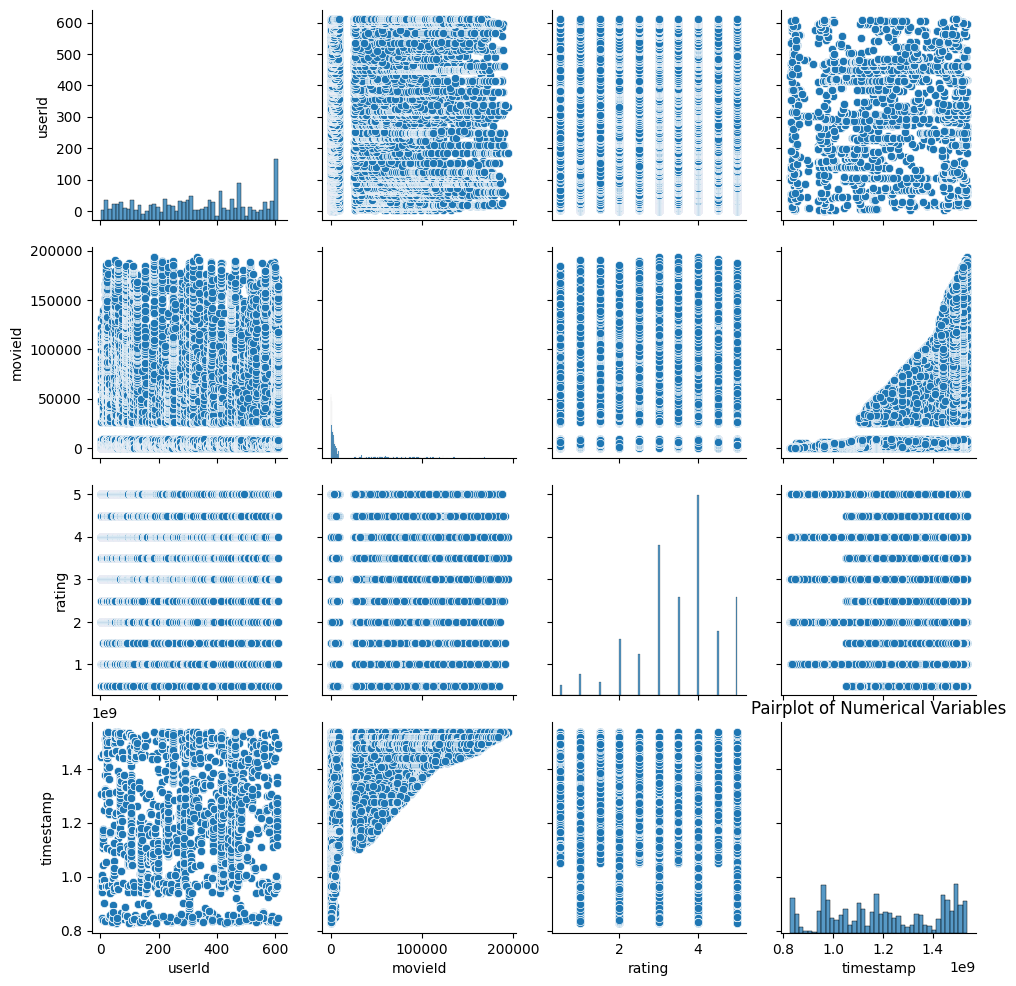

In [ ]:
sns.pairplot(new_df[['userId', 'movieId', 'rating', 'timestamp']])
plt.title('Pairplot of Numerical Variables')
plt.show()

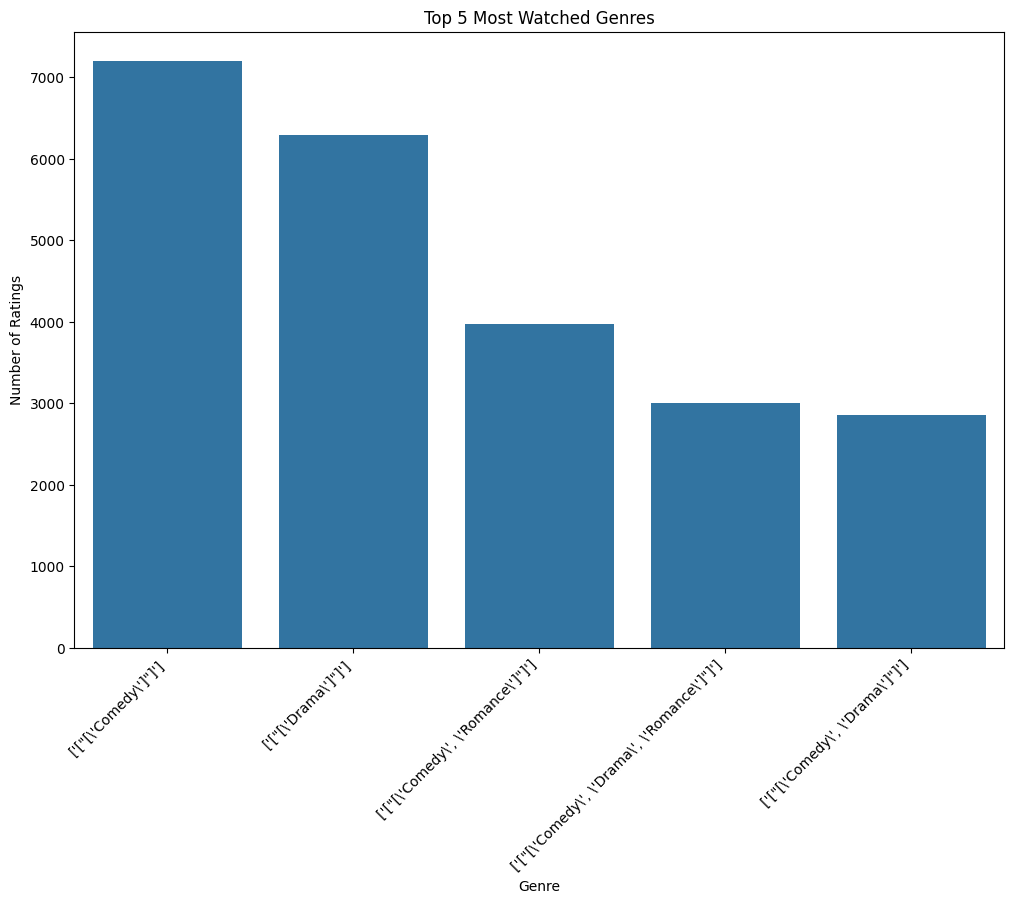

In [ ]:
# Convert 'genres' column to string values
new_df['genres'] = new_df['genres'].astype(str)

# Splitting genres and merging with ratings data
new_df['genres'] = new_df['genres'].str.split('|')
genres_df = new_df.explode('genres')

# Count the number of occurrences of each genre
genre_counts = genres_df['genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Selecting the top five genres
top_five_genres = genre_counts.head(5)

# Plotting the top five most watched genres
plt.figure(figsize=(12, 8))
sns.barplot(data=top_five_genres, x='Genre', y='Count')
plt.title('Top 5 Most Watched Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()


The chart clearly shows the most rated and liked Genres By the people:

**Model training and evaluation**

In [ ]:
pip install scikit-surprise

In [ ]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

new_df.to_csv('new_df.csv', index=False)
# Specifing the parameters for the Reader
reader = Reader(line_format='user item rating', sep=',', rating_scale=(1, 5), skip_lines=1)

# Loading the merged dataset into Surprise
data = Dataset.load_from_file('new_df.csv', reader=reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

algo = KNNBasic(sim_options={'user_based': True})

# Training the algorithm on the training set
algo.fit(trainset)

# Evaluating the model
user_pred = algo.test(testset)
accuracy = rmse(user_pred )
print('RMSE:', accuracy)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9442
RMSE: 0.9442253602192259


 An RMSE below 1 is generally considered good for recommendation systems, suggesting that user-based collaborative filtering is effective in predicting user ratings with reasonable accuracy.

--Item Based Collaborations

In [ ]:
reader = Reader(line_format='user item rating', sep=',', rating_scale=(1, 5), skip_lines=1)
data = Dataset.load_from_file('new_df.csv', reader=reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

algo = KNNBasic(sim_options={'user_based': False})

# Training the algorithm on the training set
algo.fit(trainset)

# Evaluating the model
item = algo.test(testset)
accuracy = rmse(item)
print('RMSE:', accuracy)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9115
RMSE: 0.9114750148558062


 An RMSE below 1 is suggesting that our approach of item-based collaborative filtering is effective in predicting user ratings with reasonable accuracy.

Doing Hybrid Collaboration ::

In [ ]:
from surprise import Dataset, Reader, KNNBasic, accuracy, Prediction
from surprise.model_selection import train_test_split

reader = Reader(line_format='user item rating', sep=',', rating_scale=(1, 5), skip_lines=1)
data = Dataset.load_from_file('new_df.csv', reader=reader)

# Splitting the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Training user-based collaborative filtering algorithm
user_algo = KNNBasic(sim_options={'user_based': True})
user_algo.fit(trainset)

# Training item-based collaborative filtering algorithm
item_algo = KNNBasic(sim_options={'user_based': False})
item_algo.fit(trainset)

# Predicting ratings using both algorithms
user_preds = user_algo.test(testset)
item_preds = item_algo.test(testset)

# Combining predictions using weighted average
user_weight = 0.5
item_weight = 0.5
weighted_preds = []

for user_pred, item_pred in zip(user_preds, item_preds):
    user_id = user_pred.uid
    item_id = user_pred.iid
    true_rating = user_pred.r_ui
    est_rating = (user_weight * user_pred.est) + (item_weight * item_pred.est)
    weighted_preds.append(Prediction(user_id, item_id, true_rating, est_rating, None))

# Calculating RMSE for the weighted combination
rmse_score = accuracy.rmse(weighted_preds)
print('RMSE (Weighted Combination):', rmse_score)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8758
RMSE (Weighted Combination): 0.8757972263572658


 Here also RMSE below 1 is suggesting that our hybrid approach of combining user-based and item-based collaborative filtering is effective in predicting user ratings with reasonable accuracy.

In [ ]:
mae_score = accuracy.mae(weighted_preds)
print('MAE (Weighted Combination):', mae_score)


MAE:  0.6724
MAE (Weighted Combination): 0.6724160700543003


An MAE of 0.6724 indicates that the average absolute difference between the predicted and actual ratings is approximately 0.6724 units. This value is relatively low, indicating that the prediction errors are consistently small, which confirms that the system performs well in predicting user ratings accurately.